In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
from tensorflow.keras.layers import MaxPooling2D

In [6]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

In [7]:
from keras.models import Sequential
#from keras.models import Conv2D
from keras.layers.convolutional import Conv2D
#from keras.models.convolutional import Dense
#from keras.models.convolutional import Dropout
#from keras.models.convolutional import Flatten
#from keras.models.convolutional import MaxPooling2D

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


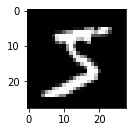

In [9]:
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [13]:
batch_size = 128
num_classes = 10
epochs = 100

In [14]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [15]:
model = Sequential()

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [18]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [19]:
train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

In [20]:

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=10, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


937/937 [==============================] - 32s 22ms/step - loss: 0.2012 - accuracy: 0.9347 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 2/10
937/937 [==============================] - 20s 21ms/step - loss: 0.0621 - accuracy: 0.9813 - val_loss: 0.0281 - val_accuracy: 0.9916
Epoch 3/10
937/937 [==============================] - 20s 21ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.0188 - val_accuracy: 0.9937
Epoch 4/10
937/937 [==============================] - 20s 21ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0223 - val_accuracy: 0.9922
Epoch 5/10
937/937 [==============================] - 21s 23ms/step - loss: 0.0357 - accuracy: 0.9899 - val_loss: 0.0210 - val_accuracy: 0.9934
Epoch 6/10
937/937 [==============================] - 20s 22ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0194 - val_accuracy: 0.9938
Epoch 7/10
937/937 [==============================] - 20s 21ms/step - loss: 0.0292 - accuracy: 0.9916 - val_loss: 0.0181 - val_accuracy: 0.9931
Epo

In [21]:
score = model.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0249 - accuracy: 0.9926

Test accuracy:  0.9926000237464905


In [24]:
import pandas as pd


In [25]:
#predict_x=model.predict(X_test) 
#classes_x=np.argmax(predict_x,axis=1)
predictions = model.predict(x_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

In [26]:
model.save('mnist_final.h5')

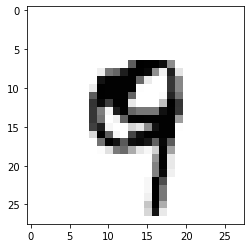

In [28]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))

In [29]:
print('The number predicted is : ', pred.argmax())

The number predicted is :  9
